In [7]:
import pandas as pd
import os
import cohere
co = cohere.Client('yCISxnxnbFS7Vom1zDuLJoHBHyUNtWxPSnOGoUFm')

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

In [8]:
def get_comparison(excerpt_1, excerpt_2,excerpt_3):
    while True:
        try:
            response = co.chat(
                message=f"""
                You are an AI grader that given an output and a criterion, grades the completion based on
                the prompt and criterion. Below "Excerpt A", "Excerpt B" and "Excerpt B", 
                you must compare both excerpts and output which excerpt is better.

                ## Excerpt A
                {excerpt_1}

                ## Excerpt B
                {excerpt_2}

                ## Excerpt C
                {excerpt_3}

                ## Criterion
                Do not focus on the grammer, instead focus on the overall future plan and robust explainability.
                [Answer with either "A" or "B" or "C".
                A. If Excerpt A is the best, detailed, transparent with robust financials.
                B. If Excerpt B is the best, detailed, transparent with robust financials.
                C. If Excerpt C is the best, detailed, transparent with robust financials.
                .]

                """
            )
            print(response)
            return response.text
        except Exception as e:
            print(f"An error occurred: {e}")
            print("Waiting 1 minute before retrying...")
            time.sleep(60)  # Sleep for 1 minute before retrying

In [13]:
comparision_df = pd.DataFrame(columns=[
    "ticker_1","ticker_2","ticker_3","year","section","BIS"
])

In [14]:
years_list = ["2019","2020","2021","2022","2023"]

for year in years_list:
    df_1 = pd.read_csv(f"IBM/{year}.csv")
    df_2 = pd.read_csv(f"AAPL/{year}.csv")
    df_3 = pd.read_csv(f"RGLD/{year}.csv")

    grouped_df_1 = df_1[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()
    grouped_df_2 = df_2[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()
    grouped_df_3 = df_3[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()

    for sec in grouped_df_1.section.unique():
        excerpt_1 = grouped_df_1[grouped_df_1["section"]==sec]["text"]
        excerpt_2 = grouped_df_2[grouped_df_2["section"]==sec]["text"]
        excerpt_3 = grouped_df_3[grouped_df_3["section"]==sec]["text"]

        if excerpt_2.empty:
            continue

        if excerpt_3.empty:
            continue

        comparision = get_comparison(excerpt_1=excerpt_1.to_string(index=False).replace("  ", ""), 
                                    excerpt_2=excerpt_2.to_string(index=False).replace("  ", ""),
                                    excerpt_3=excerpt_3.to_string(index=False).replace("  ", "")
                                    )
        
        new_row = {
                "ticker_1":"IBM",
                "ticker_2":"AAPL",
                "ticker_3":"RGLD",
                "year":year,
                "section":sec,
                "BIS":comparision
            }
        comparision_df = pd.concat([comparision_df, pd.DataFrame([new_row])], ignore_index=True)


text='C. Excerpt C demonstrates a stronger understanding of robust explainability and future planning. While all three excerpts provide brief glimpses into potential business strategies, Excerpt C offers a more comprehensive introduction to Royal Gold, Inc., suggesting a level of transparency and detail that could be expanded upon further in the document. \n\nExcerpt A, while mentioning International Business Machines Corporation, does not provide enough context to understand its future plans or financial strategies. Similarly, Excerpt B hints at historical data but does not offer a clear direction regarding future goals and explanations. \n\nThus, Excerpt C is the best choice based on the provided criterion, as it sets a foundation for a detailed and transparent future plan, even though specific financial details are not explicitly mentioned.' generation_id='f75b188f-da38-4004-973b-629252aa5eb3' citations=None documents=None is_search_required=None search_queries=None search_results=N

In [16]:
comparision_df.to_csv("comparision_3.csv")

In [17]:
pd.read_csv("comparision_3.csv")

,Unnamed: 0,ticker_1,ticker_2,ticker_3,year,section,BIS,BIS Winner
0,0,IBM,AAPL,RGLD,2019,BUSINESS,C. Excerpt C demonstrates a stronger understan...,C
1,1,IBM,AAPL,RGLD,2019,COMPENSATION,C. Excerpt C is the best option based on the c...,C
2,2,IBM,AAPL,RGLD,2019,CONTROLS_AND_PROCEDURES,C,C
3,3,IBM,AAPL,RGLD,2019,FINANCIAL_STATEMENTS,C. Excerpt C is the best example of a detailed...,C
4,4,IBM,AAPL,RGLD,2019,PROPERTIES,The answer is A. \n\nExcerpt A provides a spec...,A
5,5,IBM,AAPL,RGLD,2019,RISK_FACTORS,C,C
6,6,IBM,AAPL,RGLD,2020,BUSINESS,C. Excerpt C provides a clear and concise desc...,C
7,7,IBM,AAPL,RGLD,2020,COMPENSATION,C. Excerpt C is the best option based on the c...,C
8,8,IBM,AAPL,RGLD,2020,CONTROLS_AND_PROCEDURES,C. Excerpt C is the best as it emphasizes the ...,C
9,9,IBM,AAPL,RGLD,2020,FINANCIAL_STATEMENTS,C. Excerpt C is the best example of a detailed...,C


In [38]:
years_list = ["2019","2020","2021","2022","2023"]
ticker_list = ["IBM","AAPL","RGLD"]

ticker_dict = {
    "IBM":"AAPL",
    "AAPL":"RGLD",
    "RGLD":"IBM"
}

counter=0

for ticker_1 in ticker_list:
    ticker_2 = ticker_dict[ticker_1]

    for year in years_list:
        df_1 = pd.read_csv(f"{ticker_1}/{year}.csv")
        df_2 = pd.read_csv(f"{ticker_2}/{year}.csv")

        grouped_df_1 = df_1[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()
        grouped_df_2 = df_2[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()

        for sec in grouped_df_1.section.unique():
            excerpt_1 = grouped_df_1[grouped_df_1["section"]==sec]["text"]
            excerpt_2 = grouped_df_2[grouped_df_2["section"]==sec]["text"]
            #.to_string(index=False)
            if excerpt_2.empty:
                continue

            # print("EXCERPT 1")
            # print(excerpt_1.to_string(index=False))
            # print(ticker_1)

            # print("EXCERPT 2")
            # print(excerpt_2.to_string(index=False))
            
            # print(ticker_2)
            # print(year)

            comparision = get_comparison(excerpt_1=excerpt_1.to_string(index=False).replace("  ", ""), 
                                        excerpt_2=excerpt_2.to_string(index=False).replace("  ", ""))
            counter+=1
            letter = comparision.split(";")
            new_row = {
                "ticker_1":ticker_1,
                "ticker_2":ticker_2,
                "year":year,
                "section":sec,
                "comparision":letter[0],
                "explaination":letter[1]
            }
            comparision_df = pd.concat([comparision_df, pd.DataFrame([new_row])], ignore_index=True)

text="1; Excerpt 2 provides a more direct and concise introduction to the information that will be presented, offering a clearer understanding of the content's purpose and potential value to the reader." generation_id='3256e7b3-8527-4f0a-a3c9-eeba97998ae7' citations=None documents=None is_search_required=None search_queries=None search_results=None finish_reason='COMPLETE' tool_calls=None chat_history=[ChatMessage(role='USER', message='\n                You are an AI grader that given an output and a criterion, grades the completion based on\n                the prompt and criterion. Below "Excerpt 1" and "Excerpt 2", you must compare both excerpts and output which excerpt is better.\n                Do not focus on the grammer, instead focus on the overall future plan and robust explainability.\n                [Answer with a number in the 0-2 range, followed by a semi-colon, and then a brief motivation. \n                Do not use quotation marks.]\n\n                ## Excerpt 1\n 

KeyboardInterrupt: 

In [13]:
comparision_df.comparision.value_counts()

comparision
Excerpt 2    143
Excerpt 1     10
Name: count, dtype: int64

In [14]:
comparision_df.to_csv("comapre_1.csv")

In [20]:
test = pd.read_csv("IBM/2022.csv")

In [21]:
test.section.value_counts()

section
EXHIBITS                      83
RISK_FACTORS                  33
BUSINESS                      23
COMPENSATION                  19
PROPERTIES                     3
CONTROLS_AND_PROCEDURES        2
LEGAL_PROCEEDINGS              1
MARKET_RISK_DISCLOSURES        1
FINANCIAL_STATEMENTS           1
RELATED_PARTY_TRANSACTIONS     1
ACCOUNTING_FEES                1
Name: count, dtype: int64

In [23]:
test_agg = test[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()

In [34]:
test_agg[test_agg["section"]=="EXHIBITS"].to_string().replace("  ", "")

'section text\n4EXHIBITSThe following documents are filed as part of this report: Financial statements from IBM’s 2022 Annual Report to Stockholders, which are incorporated herein by reference: Consolidated Income Statement for the\xa0years ended December\xa031, 2022, 2021 and 2020 (page\xa046). Consolidated Statement of Comprehensive Income for the\xa0years ended December\xa031, 2022, 2021 and 2020 (page\xa047). Consolidated Balance Sheet at December\xa031, 2022 and 2021 (page 48). Consolidated Statement of Cash Flows for the\xa0years ended December\xa031, 2022, 2021 and 2020 (page\xa049). Financial statement schedule required to be filed by Item\xa08 of this Form: Valuation and Qualifying Accounts and Reserves for the\xa0years ended December\xa031, 2022, 2021, and 2020. All other schedules are omitted as the required matter is not present, the amounts are not significant or the information is shown in the Consolidated Financial Statements or the notes thereto. The Certificate of Inco

In [19]:
df=pd.read_csv("comparision_3.csv")

In [21]:
df['BIS Winner'].value_counts()

BIS Winner
C    21
A     4
B     2
Name: count, dtype: int64

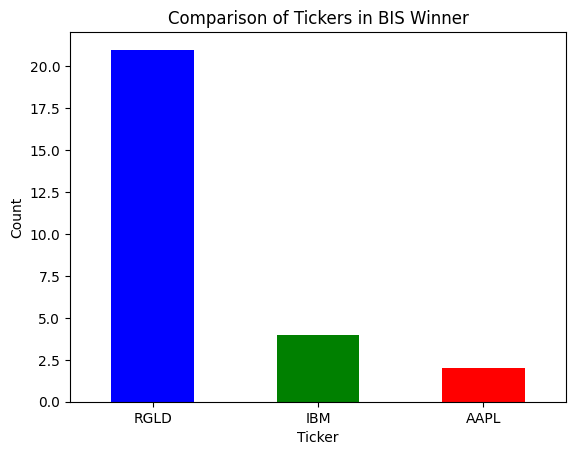

In [24]:
ticker_counts = df['BIS Winner'].value_counts()

# Plotting the results
ticker_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Comparison of Tickers in BIS Winner')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.show()

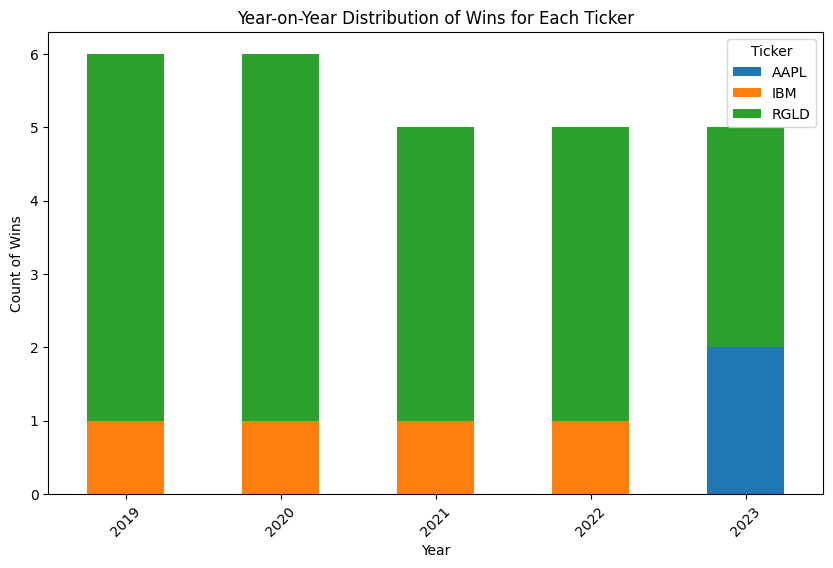

In [23]:
ticker_mapping = {'A': 'IBM', 'B': 'AAPL', 'C': 'RGLD'}
df['BIS Winner'] = df['BIS Winner'].map(ticker_mapping)

# Group by year and BIS Winner, then count occurrences of each ticker
yearly_counts = df.groupby(['year', 'BIS Winner']).size().unstack(fill_value=0)

# Plotting
yearly_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Year-on-Year Distribution of Wins for Each Ticker')
plt.xlabel('Year')
plt.ylabel('Count of Wins')
plt.xticks(rotation=45)
plt.legend(title='Ticker')
plt.show()

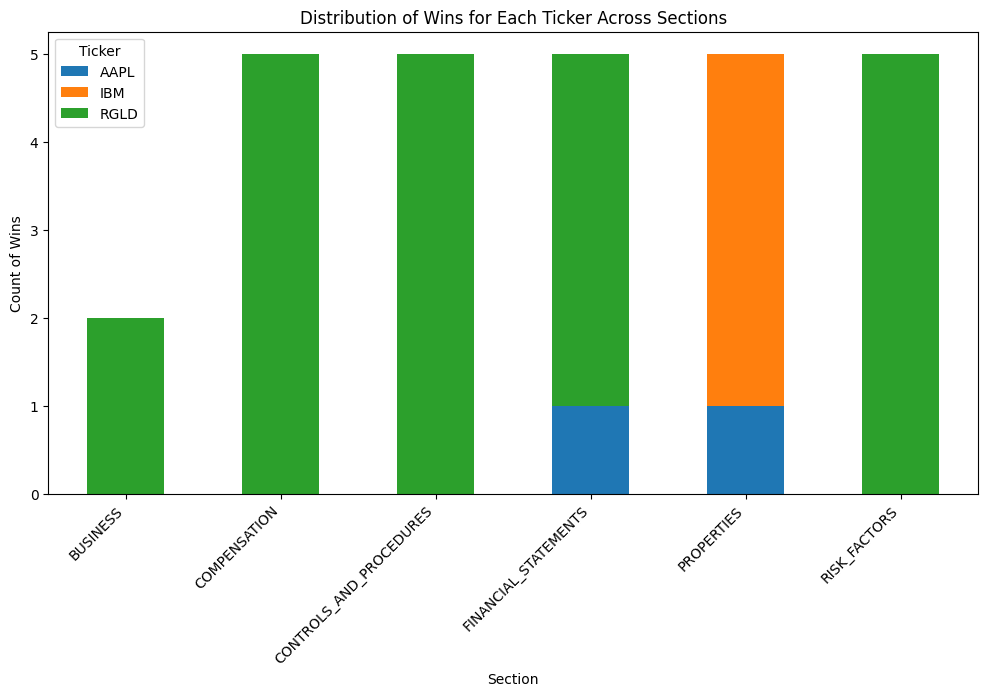

In [27]:
section_counts = df.groupby(['section', 'BIS Winner']).size().unstack(fill_value=0)

# Plotting
section_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Wins for Each Ticker Across Sections')
plt.xlabel('Section')
plt.ylabel('Count of Wins')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ticker')
plt.show()